In [38]:
# Author: Sam Joshua Caballero
# Date: 2025-06-13
# Description: This notebook automates the calculations done to generate SEO website performance reports.

In [39]:
import pandas as pd
import os
import plotly.express as px
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.dml.color import RGBColor
from pptx.enum.shapes import MSO_SHAPE, MSO_SHAPE_TYPE
from pptx.enum.text import PP_ALIGN

## User Inputs

In [40]:
# Process Variables
month = "April"
year = "2025"
gsc_file_queries = "GSC Input/queries.csv"
gsc_file_pages = "GSC Input/pages.csv"
gsc_file_countries = "GSC Input/countries.csv"
gsc_file_devices = "GSC Input/devices.csv"
ahrefs_keywords = "AHREFS Input/Ah_organic_keywords.csv"
ahrefs_pages = "AHREFS Input/Ah_top_pages.csv"
save_csv_files = True
save_charts = True
output_folder = "Output"

# Process 1 A Configurations
top_ten = True
top_twenty = False
top_one_hundred = False
queries_with_most_clicks = 10 # options: 5, 10, 15, and 20
queries_with_most_impressions = 15 # options: 10, 15, 20

# Process 1/2 B Configurations 
top_5_best_performing_pages = True
top_5_worst_performing_pages = True

In [41]:
# Powerpoint Variables
powerpoint_template = "PPT Input/Performance Report Template.pptx"

# Powerpoint Configurations
ppt_background_color = "013220"
ppt_website = "Dr. Home Fixer"

## Main Process

In [42]:
# === Main Process ===
try:
    df_queries = pd.read_csv(gsc_file_queries)
    df_pages = pd.read_csv(gsc_file_pages)
    df_countries = pd.read_csv(gsc_file_countries)
    df_devices = pd.read_csv(gsc_file_devices)
    ah_keywords = pd.read_csv(ahrefs_keywords)
    ah_pages = pd.read_csv(ahrefs_pages)
except FileNotFoundError:
    print(f"Error: File/s not found. Please check the file name or path.")
    exit()
except Exception as e:
    print(f"Error reading file: {e}")
    exit()

try:
    ppt = Presentation(powerpoint_template)
except PackageNotFoundError:
    print("Error: The file was not found or is not a valid .pptx file.")
except Exception as e:
    print(f"Unexpected error: {e}")

# === Process Powerpoint ===
slide1 = ppt.slides[0]
for shape in slide1.shapes:
    if shape.has_text_frame:
        print(shape.text)
        text_frame = shape.text_frame
        if "Website" in shape.text:
            shape.text = ppt_website
            text_frame.paragraphs[0].alignment = PP_ALIGN.CENTER
            run = text_frame.paragraphs[0].runs[0]
            run.font.color.rgb = RGBColor(255,255,255)
            

        if "Month" in shape.text:
            shape.text = month + " " + year
            text_frame.paragraphs[0].alignment = PP_ALIGN.CENTER
            run = text_frame.paragraphs[0].runs[0]
            run.font.color.rgb = RGBColor(255,255,255)


SEO REPORT

Website
Month 2025


## Process 1: Google Search Console

### Process 1A (Output 1): Total Number of Queries

In [43]:
# Process
total_number_of_queries = df_queries.shape[0]

# Print Results
print(f"Total Number of Queries: {total_number_of_queries}")

# Save to TXT
if save_csv_files:
    os.makedirs(output_folder, exist_ok=True)
    with open(f'{output_folder}/1_GSC_Total_Queries.txt', 'w') as f:
        f.write(f"Total Number of Queries: {total_number_of_queries}\n")
    print(f"Saved to {output_folder}/1_GSC_Total_Queries.txt")

Total Number of Queries: 393
Saved to Output/1_GSC_Total_Queries.txt


### Process 1A (Outputs 2-4): Queries with average position 1-10, 11-20, and 21-100

In [44]:
# Process
def categorize_by_position(df_queries, top_ten=False, top_twenty=False, top_one_hundred=False):
    result = {}

    if top_ten:
        result['top_1_to_10'] = df_queries[(df_queries['Position'] >= 1) & (df_queries['Position'] <= 10)]

    if top_twenty:
        result['pos_11_to_20'] = df_queries[(df_queries['Position'] > 10) & (df_queries['Position'] <= 20)]

    if top_one_hundred:
        result['pos_21_to_100'] = df_queries[(df_queries['Position'] > 20) & (df_queries['Position'] <= 100)]

    return result
    
categories = categorize_by_position(df_queries, top_ten=True, top_twenty=True, top_one_hundred=True)

# Print Results
for label, data in categories.items():
    print(f"\nQueries/Keywords with Position Range: {label.replace('_', ' ').title()}")
    print(data.shape[0])

# Save to CSV
if save_csv_files:
    os.makedirs(output_folder, exist_ok=True) 
    categories['top_1_to_10'].to_csv(f'{output_folder}/2_GSC_Rank_1_to_10_Queries.csv', index=False)
    print(f"Saved to {output_folder}/2_GSC_Rank_1_to_10_Queries.csv")
    categories['pos_11_to_20'].to_csv(f'{output_folder}/3_GSC_Rank_11_to_20_Queries.csv', index=False)
    print(f"Saved to {output_folder}/3_GSC_Rank_11_to_20_Queries.csv")
    categories['pos_21_to_100'].to_csv(f'{output_folder}/4_GSC_Rank_21_to_100_Queries.csv', index=False)
    print(f"Saved to {output_folder}/4_GSC_Rank_21_to_100_Queries.csv")

# Process Powerpoint
slide4 = ppt.slides[3]
for shape in slide4.shapes:
    if not shape.has_text_frame:
        continue
    for paragraph in shape.text_frame.paragraphs:
        for run in paragraph.runs:
            text = run.text
            text = text.replace("Website", ppt_website)
            text = text.replace("x_queries", str(total_number_of_queries))
            text = text.replace("y_queries_top_10", str(categories['top_1_to_10'].shape[0]))
            text = text.replace("ztop20", str(categories['pos_11_to_20'].shape[0]))
            text = text.replace("Ztop100", str(categories['pos_21_to_100'].shape[0]))
            run.text = text


Queries/Keywords with Position Range: Top 1 To 10
2

Queries/Keywords with Position Range: Pos 11 To 20
11

Queries/Keywords with Position Range: Pos 21 To 100
379
Saved to Output/2_GSC_Rank_1_to_10_Queries.csv
Saved to Output/3_GSC_Rank_11_to_20_Queries.csv
Saved to Output/4_GSC_Rank_21_to_100_Queries.csv


### Process 1A (Outputs 5): Top x queries with the most clicks

In [45]:
# Process
def get_top_queries_by_clicks(df_queries, queries_with_most_clicks=10):
    top_clicks_df = df_queries.sort_values(by='Clicks', ascending=False).head(queries_with_most_clicks)
    return top_clicks_df

top_clicks = get_top_queries_by_clicks(df_queries, queries_with_most_clicks)
top_clicks = top_clicks.reset_index(drop=True)
top_clicks.insert(0, 'Rank', top_clicks.index + 1)

# Print Results
print(f"\nTop {queries_with_most_clicks} Queries with the Most Clicks:")
print(top_clicks[['Rank', 'Top queries', 'Impressions', 'Clicks', 'CTR', 'Position']])

# Save to CSV
if save_csv_files:
    os.makedirs(output_folder, exist_ok=True) 
    top_clicks.to_csv(f'{output_folder}/5_GSC_Top_{queries_with_most_clicks}_Queries_By_Clicks.csv', index=False)
    print(f"Saved to {output_folder}/5_GSC_Top_{queries_with_most_clicks}_Queries_By_Clicks.csv")

# Process Powerpoint
slide5 = ppt.slides[4]
for shape in slide5.shapes:
    if not shape.has_text_frame:
        continue
    for paragraph in shape.text_frame.paragraphs:
        for run in paragraph.runs:
            if "Website" in run.text:
                text = run.text
                text = text.replace("Website", ppt_website)
                run.text = text
                
left = Inches(0.5)
top = Inches(1.5)
rows = top_clicks.shape[0] + 1
cols = 6
for shape in list(slide5.shapes):
    if shape.shape_type == 19:  # 19 is for table shapes
        slide5.shapes._spTree.remove(shape._element)
table_shape = slide5.shapes.add_table(rows,cols,left,top,Inches(9),Inches(0.8+0.3*rows))
table = table_shape.table
column_widths = {
    0: 1026000,  # Rank – 2.85 cm
    1: 2520000,  # Top queries – 7 cm
    2: 1026000,  # Impressions
    3: 1026000,  # Clicks
    4: 1026000,  # CTR
    5: 1026000,  # Position
}
for col_idx, width in column_widths.items():
    table.columns[col_idx].width = width
headers = ["Rank", "Top queries", "Impressions", "Clicks", "CTR", "Position"]
for col_idx, header in enumerate(headers):
    cell = table.cell(0, col_idx)
    cell.text = header
    for paragraph in cell.text_frame.paragraphs:
        for run in paragraph.runs:
            run.font.bold = True
            run.font.size = Pt(10)
for row_idx, row_data in top_clicks.iterrows():
    for col_idx, col_name in enumerate(headers):
        cell = table.cell(row_idx + 1, col_idx)
        cell.text = str(row_data[col_name])
        for paragraph in cell.text_frame.paragraphs:
            for run in paragraph.runs:
                run.font.size = Pt(10)


Top 10 Queries with the Most Clicks:
   Rank                               Top queries  Impressions  Clicks    CTR  \
0     1            how many lights for a 6ft tree          324       1  0.31%   
1     2                   flocked christmas trees          381       0     0%   
2     3          what is a flocked christmas tree          304       0     0%   
3     4  how many lights for a 6ft christmas tree          176       0     0%   
4     5        how many lights for christmas tree          169       0     0%   
5     6                    what is a flocked tree          162       0     0%   
6     7                     unlit christmas trees          158       0     0%   
7     8    how to decorate a white christmas tree          152       0     0%   
8     9         frosted vs flocked christmas tree          142       0     0%   
9    10                    flocked christmas tree          141       0     0%   

   Position  
0     31.32  
1     58.41  
2     44.37  
3     33.37  


### Process 1A (Outputs 6): Top x queries with the most impressions

In [46]:
# Process
def get_top_queries_by_impressions(df_queries, queries_with_most_impressions=15):
    top_impressions_df = df_queries.sort_values(by='Impressions', ascending=False).head(queries_with_most_impressions)
    return top_impressions_df

top_impressions = get_top_queries_by_impressions(df_queries, queries_with_most_impressions)
top_impressions = top_impressions.reset_index(drop=True)
top_impressions.insert(0, 'Rank', top_impressions.index + 1)

# Print Results
print(f"\nTop {queries_with_most_impressions} Queries with the Most Impressions:")
print(top_impressions[['Rank', 'Top queries', 'Impressions', 'Clicks', 'CTR', 'Position']])

# Save to CSV
if save_csv_files:
    os.makedirs(output_folder, exist_ok=True)  
    top_impressions.to_csv(f'{output_folder}/6_GSC_Top_{queries_with_most_impressions}_Queries_By_Impressions.csv', index=False)
    print(f"Saved to {output_folder}/6_GSC_Top_{queries_with_most_impressions}_Queries_By_Impressions.csv")

# Process Powerpoint
slide6 = ppt.slides[5]
for shape in slide6.shapes:
    if not shape.has_text_frame:
        continue
    for paragraph in shape.text_frame.paragraphs:
        for run in paragraph.runs:
            if "Website" in run.text:
                text = run.text
                text = text.replace("Website", ppt_website)
                run.text = text
                
left = Inches(0.5)
top = Inches(1.5)
rows = top_impressions.shape[0] + 1
cols = 6
for shape in list(slide6.shapes):
    if shape.shape_type == 19:  # 19 is for table shapes
        slide6.shapes._spTree.remove(shape._element)
table_shape = slide6.shapes.add_table(rows,cols,left,top,Inches(9),Inches(0.8+0.3*rows))
table = table_shape.table
column_widths = {
    0: 1026000,  # Rank – 2.85 cm
    1: 2520000,  # Top queries – 7 cm
    2: 1026000,  # Impressions
    3: 1026000,  # Clicks
    4: 1026000,  # CTR
    5: 1026000,  # Position
}
row_height = 216000
for row_idx in range(rows):
    table.rows[row_idx].height = row_height
for col_idx, width in column_widths.items():
    table.columns[col_idx].width = width
headers = ["Rank", "Top queries", "Impressions", "Clicks", "CTR", "Position"]
for col_idx, header in enumerate(headers):
    cell = table.cell(0, col_idx)
    cell.text = header
    for paragraph in cell.text_frame.paragraphs:
        for run in paragraph.runs:
            run.font.bold = True
            run.font.size = Pt(10)
for row_idx, row_data in top_impressions.iterrows():
    for col_idx, col_name in enumerate(headers):
        cell = table.cell(row_idx + 1, col_idx)
        cell.text = str(row_data[col_name])
        for paragraph in cell.text_frame.paragraphs:
            for run in paragraph.runs:
                run.font.size = Pt(8)


Top 15 Queries with the Most Impressions:
    Rank                               Top queries  Impressions  Clicks  \
0      1                   flocked christmas trees          381       0   
1      2            how many lights for a 6ft tree          324       1   
2      3          what is a flocked christmas tree          304       0   
3      4  how many lights for a 6ft christmas tree          176       0   
4      5        how many lights for christmas tree          169       0   
5      6                    what is a flocked tree          162       0   
6      7                     unlit christmas trees          158       0   
7      8    how to decorate a white christmas tree          152       0   
8      9         frosted vs flocked christmas tree          142       0   
9     10                    flocked christmas tree          141       0   
10    11                      white christmas tree          134       0   
11    12            what is flocked christmas tree       

### Process 1B (Outputs 1-2) Top performing pages

In [47]:
def extract_top_performing_pages(
    output_folder,
    top_5_best_performing_pages=False,
    save_csv_files=False
):

    # Process
    top_page = df_pages.head(1)
    top_5_pages = df_pages.head(5) if top_5_best_performing_pages else None

    # Print Results
    print("Top Performing Page:")
    print(top_page)
    
    if top_5_best_performing_pages:
        print("\nTop 5 Performing Pages:")
        print(top_5_pages)

    # Save to CSV
    if save_csv_files:
        os.makedirs(output_folder, exist_ok=True)  # Ensure the folder exists
        top_page.to_csv(f"{output_folder}/7_GSC_top_performing_page.csv", index=False)
        print(f"\nSaved to {output_folder}/7_GSC_top_performing_page.csv")

        if top_5_best_performing_pages:
            top_5_pages.to_csv(f"{output_folder}/8_GSC_top_5_performing_pages.csv", index=False)
            print(f"Saved to {output_folder}/8_GSC_top_5_performing_pages.csv")

    return top_page, top_5_pages

top_page, top_5_pages = extract_top_performing_pages(output_folder, top_5_best_performing_pages, save_csv_files)

# Process Powerpoint
top_page_ppt = top_page.iloc[0]
replacements = {
    "Website": ppt_website,
    "toppageurl": str(top_page_ppt['Top pages']).rsplit('/', 1)[-1],
    "toppageclicks": str(top_page_ppt['Clicks']),
    "toppageimpressions": str(top_page_ppt['Impressions']),
    "toppagectr": str(top_page_ppt['CTR']),
    "toppagepos": str(top_page_ppt['Position']),
}

slide7 = ppt.slides[6]
for shape in slide7.shapes:
    if not shape.has_text_frame:
        continue
    for paragraph in shape.text_frame.paragraphs:
        for run in paragraph.runs:
            for key, value in replacements.items():
                if key in run.text:
                    run.text = run.text.replace(key, value)

left = Inches(1.5)
top = Inches(3.25)
rows = top_5_pages.shape[0] + 1
cols = 5
for shape in list(slide7.shapes):
    if shape.shape_type == 19:  # 19 is for table shapes
        slide7.shapes._spTree.remove(shape._element)
table_shape = slide7.shapes.add_table(rows,cols,left,top,Inches(9),Inches(0.8+0.3*rows))
table = table_shape.table
column_widths = {
    0: 2520000,  # Top pages – 7 cm
    1: 1026000,  # Impressions - 2.85 cm
    2: 1026000,  # Clicks
    3: 1026000,  # CTR
    4: 1026000,  # Position
}
row_height = 216000
for row_idx in range(rows):
    table.rows[row_idx].height = row_height
for col_idx, width in column_widths.items():
    table.columns[col_idx].width = width
headers = ["Top pages", "Clicks", "Impressions", "CTR", "Position"]
for col_idx, header in enumerate(headers):
    cell = table.cell(0, col_idx)
    cell.text = header
    for paragraph in cell.text_frame.paragraphs:
        for run in paragraph.runs:
            run.font.bold = True
            run.font.size = Pt(10)
for row_idx, row_data in top_5_pages.iterrows():
    for col_idx, col_name in enumerate(headers):
        cell = table.cell(row_idx + 1, col_idx)
        cell.text = str(row_data[col_name])
        for paragraph in cell.text_frame.paragraphs:
            for run in paragraph.runs:
                run.font.size = Pt(8)

Top Performing Page:
                                           Top pages  Clicks  Impressions  \
0  https://hearthfir.com/blogs/hearth-fir-blog/ho...       1         2373   

     CTR  Position  
0  0.04%     41.71  

Top 5 Performing Pages:
                                           Top pages  Clicks  Impressions  \
0  https://hearthfir.com/blogs/hearth-fir-blog/ho...       1         2373   
1              https://hearthfir.com/collections/all       1          137   
2   https://hearthfir.com/collections/special-offers       1            8   
3  https://hearthfir.com/blogs/hearth-fir-blog/fl...       0         1190   
4  https://hearthfir.com/blogs/hearth-fir-blog/ch...       0          913   

     CTR  Position  
0  0.04%     41.71  
1  0.73%     63.29  
2  12.5%     11.25  
3     0%     35.82  
4     0%     49.26  

Saved to Output/7_GSC_top_performing_page.csv
Saved to Output/8_GSC_top_5_performing_pages.csv


### Process 1B (Outputs 3-4) Underperforming pages

In [48]:
def extract_underperforming_performing_pages(
    output_folder,
    top_5_worst_performing_pages=False,
    save_csv_files=False
):

    # Process
    bottom_page = df_pages.tail(1)
    bottom_5_pages = df_pages.tail(5) if top_5_worst_performing_pages else None

    # Print Results
    print("Worst Performing Page:")
    print(bottom_page)
    
    if top_5_worst_performing_pages:
        print("\nBottom 5 Performing Pages:")
        print(bottom_5_pages)

    # Save to CSV
    if save_csv_files:
        os.makedirs(output_folder, exist_ok=True)  
        bottom_page.to_csv(f"{output_folder}/9_GSC_worst_performing_page.csv", index=False)
        print(f"\nSaved to {output_folder}/9_GSC_worst_performing_page.csv")

        if top_5_worst_performing_pages:
            bottom_5_pages.to_csv(f"{output_folder}/10_GSC_bottom_5_performing_pages.csv", index=False)
            print(f"Saved to {output_folder}/10_GSC_bottom_5_performing_pages.csv")

    return bottom_page, bottom_5_pages

bottom_page, bottom_5_pages = extract_underperforming_performing_pages(output_folder, top_5_worst_performing_pages, save_csv_files)

# Process Powerpoint
bottom_page_ppt = bottom_page.iloc[0]
replacements = {
    "Website": ppt_website,
    "bottompageurl": str(bottom_page_ppt['Top pages']).rsplit('/', 1)[-1],
    "bottompageclicks": str(bottom_page_ppt['Clicks']),
    "pageimpressions": str(bottom_page_ppt['Impressions']),
    "toppagectr": str(bottom_page_ppt['CTR']),
    "toppagepos": str(bottom_page_ppt['Position']),
}

slide8 = ppt.slides[7]
for shape in slide8.shapes:
    if not shape.has_text_frame:
        continue
    for paragraph in shape.text_frame.paragraphs:
        for run in paragraph.runs:
            for key, value in replacements.items():
                if key in run.text:
                    run.text = run.text.replace(key, value)

left = Inches(1.5)
top = Inches(3.25)
rows = bottom_5_pages.shape[0] + 1
cols = 5
for shape in list(slide8.shapes):
    if shape.shape_type == 19:  # 19 is for table shapes
        slide8.shapes._spTree.remove(shape._element)
table_shape = slide8.shapes.add_table(rows,cols,left,top,Inches(9),Inches(0.8+0.3*rows))
table = table_shape.table
column_widths = {
    0: 2520000,  # Top pages – 7 cm
    1: 1026000,  # Impressions - 2.85 cm
    2: 1026000,  # Clicks
    3: 1026000,  # CTR
    4: 1026000,  # Position
}
row_height = 216000
for row_idx in range(rows):
    table.rows[row_idx].height = row_height
for col_idx, width in column_widths.items():
    table.columns[col_idx].width = width
bottom_5_pages = bottom_5_pages.reset_index(drop=True)
headers = ["Top pages", "Clicks", "Impressions", "CTR", "Position"]
for col_idx, header in enumerate(headers):
    cell = table.cell(0, col_idx)
    cell.text = header
    for paragraph in cell.text_frame.paragraphs:
        for run in paragraph.runs:
            run.font.bold = True
            run.font.size = Pt(10)
for row_idx, row_data in bottom_5_pages.iterrows():
    for col_idx, col_name in enumerate(headers):
        cell = table.cell(row_idx + 1, col_idx)
        cell.text = str(row_data[col_name])
        for paragraph in cell.text_frame.paragraphs:
            for run in paragraph.runs:
                run.font.size = Pt(8)

Worst Performing Page:
                                           Top pages  Clicks  Impressions CTR  \
51  https://hearthfir.com/products/9-ft-flocked-tree       0            1  0%   

    Position  
51      19.0  

Bottom 5 Performing Pages:
                                            Top pages  Clicks  Impressions  \
47  https://hearthfir.com/collections/under-6-ft-a...       0            1   
48      https://hearthfir.com/pages/pipeda-compliance       0            1   
49  https://hearthfir.com/products/7-ft-pre-lit-mixed       0            1   
50    https://hearthfir.com/products/7-ft-unlit-mixed       0            1   
51   https://hearthfir.com/products/9-ft-flocked-tree       0            1   

   CTR  Position  
47  0%       5.0  
48  0%       5.0  
49  0%       5.0  
50  0%      10.0  
51  0%      19.0  

Saved to Output/9_GSC_worst_performing_page.csv
Saved to Output/10_GSC_bottom_5_performing_pages.csv


### Process 1C (Output 1) Top 5 Countries

In [49]:
def extract_top_countries(
    output_folder,
    save_csv_files=False
):

    # Process
    top_countries = df_countries.head(5)

    # Print Results
    print("Top 5 Countries:")
    print(top_countries)

    # Save to CSV
    if save_csv_files:
        os.makedirs(output_folder, exist_ok=True)  
        top_countries.to_csv(f"{output_folder}/11_GSC_top_countries.csv", index=False)
        print(f"\nSaved to {output_folder}/11_GSC_top_countries.csv")

    return top_countries

top_countries = extract_top_countries(output_folder, save_csv_files)

# Process Powerpoint
slide9 = ppt.slides[8]
for shape in slide9.shapes:
    if not shape.has_text_frame:
        continue
    for paragraph in shape.text_frame.paragraphs:
        for run in paragraph.runs:
            if "Website" in run.text:
                text = run.text
                text = text.replace("Website", ppt_website)
                run.text = text
                
left = Inches(0.5)
top = Inches(1.5)
rows = top_countries.shape[0] + 1
cols = 5
for shape in list(slide9.shapes):
    if shape.shape_type == 19:  # 19 is for table shapes
        slide9.shapes._spTree.remove(shape._element)
table_shape = slide9.shapes.add_table(rows,cols,left,top,Inches(9),Inches(0.8+0.3*rows))
table = table_shape.table
column_widths = {
    0: 1026000,  # Country – 2.85 cm
    1: 1026000,  # Clicks
    2: 1026000,  # Impressions
    3: 1026000,  # CTR
    4: 1026000,  # Position
}
for col_idx, width in column_widths.items():
    table.columns[col_idx].width = width
headers = ["Country", "Clicks", "Impressions", "CTR", "Position"]
for col_idx, header in enumerate(headers):
    cell = table.cell(0, col_idx)
    cell.text = header
    for paragraph in cell.text_frame.paragraphs:
        for run in paragraph.runs:
            run.font.bold = True
            run.font.size = Pt(10)
for row_idx, row_data in top_countries.iterrows():
    for col_idx, col_name in enumerate(headers):
        cell = table.cell(row_idx + 1, col_idx)
        cell.text = str(row_data[col_name])
        for paragraph in cell.text_frame.paragraphs:
            for run in paragraph.runs:
                run.font.size = Pt(10)

Top 5 Countries:
          Country  Clicks  Impressions    CTR  Position
0     Philippines       3           67  4.48%     40.91
1   United States       0         4007     0%     43.57
2          Brazil       0         1281     0%     42.95
3          Canada       0          488     0%     55.28
4  United Kingdom       0          419     0%     46.76

Saved to Output/11_GSC_top_countries.csv


### Process 1D (Output 1) Pie Chart for Clicks by Device Type

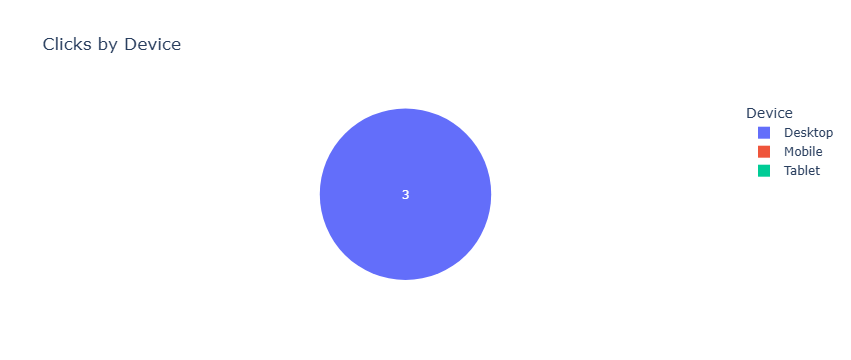

Saved to Output\12_GSC_Clicks_By_Device.png


In [50]:
def plot_clicks_by_device(output_folder=".", save_charts=False):

    # Process
    fig = px.pie(
        df_devices,
        names="Device",
        values="Clicks",
        title="Clicks by Device",
        hole=0,  
    )
    
    fig.update_traces(
        textinfo='value',  
        textposition='inside',
        pull=[0.05]*len(df_devices),  
        insidetextorientation='auto',
        showlegend=True
    )

    fig.update_layout(
        uniformtext_minsize=12,
        uniformtext_mode='hide',
        legend_title_text="Device",
    )
    
    # Print Results
    fig.show()

    # Save Chart
    if save_charts:
        os.makedirs(output_folder, exist_ok=True)
        file_path = os.path.join(output_folder, "12_GSC_Clicks_By_Device.png")
        fig.write_image(file_path)
        print(f"Saved to {file_path}")

plot_clicks_by_device(output_folder="Output", save_charts=True)

# Process Powerpoint
slide10 = ppt.slides[9]
for shape in slide10.shapes:
    if not shape.has_text_frame:
        continue
    for paragraph in shape.text_frame.paragraphs:
        for run in paragraph.runs:
            if "Website" in run.text:
                text = run.text
                text = text.replace("Website", ppt_website)
                run.text = text
image_path = os.path.join(output_folder, "12_GSC_Clicks_By_Device.png")
left = Inches(1)  
top = Inches(1.5)    
width = Inches(6) 
height = Inches(4)
for shape in list(slide10.shapes):
    if shape.shape_type == MSO_SHAPE_TYPE.PICTURE:
        slide10.shapes._spTree.remove(shape._element)
pic = slide10.shapes.add_picture(image_path, left, top, width=width, height=height)

### Process 1D (Output 2) Pie Chart for Impressions by Device Type

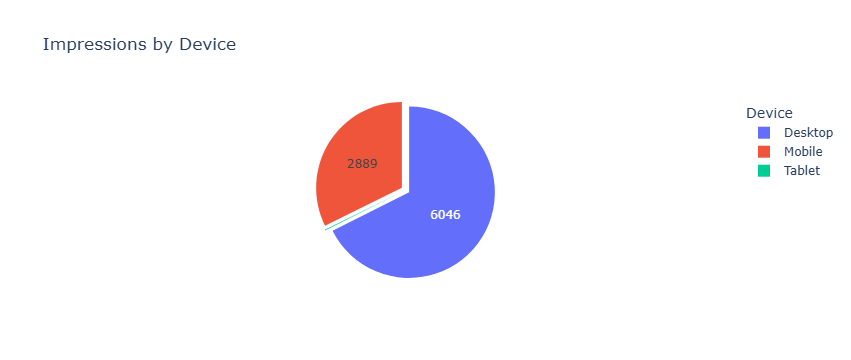

Saved to Output\13_GSC_Impressions_By_Device.png
saved


In [51]:
def plot_impressions_by_device(output_folder=".", save_charts=False):

    # Process
    fig = px.pie(
        df_devices,
        names="Device",
        values="Impressions",
        title="Impressions by Device",
        hole=0, 
    )
    
    fig.update_traces(
        textinfo='value',  
        textposition='inside',
        pull=[0.05]*len(df_devices),  
        insidetextorientation='auto',
        showlegend=True
    )

    fig.update_layout(
        uniformtext_minsize=12,
        uniformtext_mode='hide',
        legend_title_text="Device",
    )

    # Print Results
    fig.show()

    # Save Chart
    if save_charts:
        os.makedirs(output_folder, exist_ok=True)
        file_path = os.path.join(output_folder, "13_GSC_Impressions_By_Device.png")
        fig.write_image(file_path)
        print(f"Saved to {file_path}")

plot_impressions_by_device(output_folder="Output", save_charts=True)

# Process Powerpoint
slide11 = ppt.slides[10]
for shape in slide11.shapes:
    if not shape.has_text_frame:
        continue
    for paragraph in shape.text_frame.paragraphs:
        for run in paragraph.runs:
            if "Website" in run.text:
                text = run.text
                text = text.replace("Website", ppt_website)
                run.text = text
image_path = os.path.join(output_folder, "13_GSC_Impressions_By_Device.png")
left = Inches(1)  
top = Inches(1.5)    
width = Inches(6) 
height = Inches(4)
for shape in list(slide11.shapes):
    if shape.shape_type == MSO_SHAPE_TYPE.PICTURE:
        slide11.shapes._spTree.remove(shape._element)
pic = slide11.shapes.add_picture(image_path, left, top, width=width, height=height)

ppt.save(f"{month}_{year}_Performance_Report.pptx")
print("saved")

## Process 2: Ahrefs

### Process 2A (Output 1): Number of Organic Keywords

In [33]:
# Process
total_number_of_keywords = ah_keywords.shape[0]

# Print Results
print(f"Total Number of Keywords: {total_number_of_keywords}")

# Save to TXT
if save_csv_files:
    os.makedirs(output_folder, exist_ok=True)
    with open(f'{output_folder}/14_AHREFS_Total_Number_Of_Keywords.txt', 'w') as f:
        f.write(f"Total Number of Keywords: {total_number_of_keywords}\n")
    print(f"Saved to {output_folder}/14_AHREFS_A_Total_Number_Of_Keywords.txt")

Total Number of Keywords: 287
Saved to Output/14_AHREFS_A_Total_Number_Of_Keywords.txt


### Process 2A (Output 2 - 4): Number of Keywords in positions 1-10, 11-20, and 21-100

In [34]:
# Process
def categorize_by_position(ah_keywords, top_ten=False, top_twenty=False, top_one_hundred=False):
    result = {}

    ah_keywords = ah_keywords.rename(columns={"Current average position": "Position"})

    if top_ten:
        result['top_1_to_10'] = ah_keywords[(ah_keywords['Position'] >= 1) & (ah_keywords['Position'] <= 10)]

    if top_twenty:
        result['pos_11_to_20'] = ah_keywords[(ah_keywords['Position'] > 10) & (ah_keywords['Position'] <= 20)]

    if top_one_hundred:
        result['pos_21_to_100'] = ah_keywords[(ah_keywords['Position'] > 20) & (ah_keywords['Position'] <= 100)]

    return result

a_categories = categorize_by_position(ah_keywords, top_ten=True, top_twenty=True, top_one_hundred=True)

# Print Results
for label, data in a_categories.items():
    print(f"\nKeywords in Position Range: {label.replace('_', ' ').title()}")
    print(data.shape[0])

# Save to CSV
if save_csv_files:
    os.makedirs(output_folder, exist_ok=True) 
    a_categories['top_1_to_10'].to_csv(f'{output_folder}/15_AHREFS_Rank_1_to_10_Keywords.csv', index=False)
    print(f"Saved to {output_folder}/15_AHREFS_Rank_1_to_10_Keywords.csv")
    a_categories['pos_11_to_20'].to_csv(f'{output_folder}/16_AHREFS_Rank_11_to_20_Keywords.csv', index=False)
    print(f"Saved to {output_folder}/16_AHREFS_Rank_11_to_20_Keywords.csv")
    a_categories['pos_21_to_100'].to_csv(f'{output_folder}/17_AHREFS_Rank_21_to_100_Keywords.csv', index=False)
    print(f"Saved to {output_folder}/17_AHREFS_Rank_21_to_100_Keywords.csv")


Keywords in Position Range: Top 1 To 10
6

Keywords in Position Range: Pos 11 To 20
17

Keywords in Position Range: Pos 21 To 100
190
Saved to Output/15_AHREFS_Rank_1_to_10_Keywords.csv
Saved to Output/16_AHREFS_Rank_11_to_20_Keywords.csv
Saved to Output/17_AHREFS_Rank_21_to_100_Keywords.csv


### Process 2A (Output 5-6): Number of new and lost keywords

In [35]:
# Process
def categorize_keyword_status(ah_keywords, new_keywords=False, lost_keywords=False):
    result = {}

    if new_keywords:
        result['new_keywords'] = ah_keywords[
            ah_keywords['Previous average position'].isna() & ah_keywords['Current average position'].notna()
        ]

    if lost_keywords:
        result['lost_keywords'] = ah_keywords[
            ah_keywords['Previous average position'].notna() & ah_keywords['Current average position'].isna()
        ]

    return result

status_categories = categorize_keyword_status(ah_keywords, new_keywords=True, lost_keywords=True)

# Print Results
for label, data in status_categories.items():
    print(f"\nKeywords categorized as: {label.replace('_', ' ').title()}")
    print(data.shape[0])

# Save to CSV
if save_csv_files:
    os.makedirs(output_folder, exist_ok=True)
    status_categories['new_keywords'].to_csv(f"{output_folder}/18_AHREFS_New_Keywords.csv", index=False)
    print(f"Saved to {output_folder}/18_AHREFS_New_Keywords.csv")
    status_categories['lost_keywords'].to_csv(f"{output_folder}/19_AHREFS_Lost_Keywords.csv", index=False)
    print(f"Saved to {output_folder}/19_AHREFS_Lost_Keywords.csv")



Keywords categorized as: New Keywords
127

Keywords categorized as: Lost Keywords
74
Saved to Output/18_AHREFS_New_Keywords.csv
Saved to Output/19_AHREFS_Lost_Keywords.csv


### Process 2A (Outputs 7-9): Number of Keywords that increased, decreased, and stayed in positions

In [36]:
# Process
def categorize_by_position_change(ah_keywords, increased=False, decreased=False, no_movement=False):
    result = {}

    if increased:
        result['position_increased'] = ah_keywords[ah_keywords['Position change'] > 0]

    if decreased:
        result['position_decreased'] = ah_keywords[ah_keywords['Position change'] < 0]

    if no_movement:
        result['position_unchanged'] = ah_keywords[
            (ah_keywords['Position change'] == 0) &
            (ah_keywords['Previous average position'].notna()) & (ah_keywords['Previous average position'] != 0) &
            (ah_keywords['Current average position'].notna()) & (ah_keywords['Current average position'] != 0)
        ]

    return result

movement_categories = categorize_by_position_change(
    ah_keywords,
    increased=True,
    decreased=True,
    no_movement=True
)

# Print Results
for label, data in movement_categories.items():
    print(f"\nKeywords with Position Change: {label.replace('_', ' ').title()}")
    print(data.shape[0])

# Save to CSV
if save_csv_files:
    os.makedirs(output_folder, exist_ok=True)
    movement_categories['position_increased'].to_csv(f"{output_folder}/20_AHREFS_Position_Increased_Keywords.csv", index=False)
    print(f"Saved to {output_folder}/20_AHREFS_Position_Increased_Keywords.csv")
    movement_categories['position_decreased'].to_csv(f"{output_folder}/21_AHREFS_Position_Decreased_Keywords.csv", index=False)
    print(f"Saved to {output_folder}/21_AHREFS_Position_Decreased_Keywords.csv")
    movement_categories['position_unchanged'].to_csv(f"{output_folder}/22_AHREFS_Position_Unchanged_Keywords.csv", index=False)
    print(f"Saved to {output_folder}/22_AHREFS_Position_Unchanged_Keywords.csv")


Keywords with Position Change: Position Increased
36

Keywords with Position Change: Position Decreased
45

Keywords with Position Change: Position Unchanged
5
Saved to Output/20_AHREFS_Position_Increased_Keywords.csv
Saved to Output/21_AHREFS_Position_Decreased_Keywords.csv
Saved to Output/22_AHREFS_Position_Unchanged_Keywords.csv


### Process 2A (Outputs 10-11): Top 5 and Bottom 5 keywords that increased/decreased the most

In [37]:
# Process
def get_top_position_changes(ah_keywords, top_increases=False, top_drops=False, top_n=5):
    result = {}

    if top_increases:
        result['top_increases'] = ah_keywords[ah_keywords['Position change'] > 0].sort_values(
            by='Position change', ascending=False
        ).head(top_n)

    if top_drops:
        result['top_drops'] = ah_keywords[ah_keywords['Position change'] < 0].sort_values(
            by='Position change', ascending=True
        ).head(top_n)

    return result

top_changes = get_top_position_changes(
    ah_keywords,
    top_increases=True,
    top_drops=True,
    top_n=5
)

# Print Results
for label, data in top_changes.items():
    print(f"\n{label.replace('_', ' ').title()}:")
    print(data[['Keyword', 'Position change']])

# Save to CSV
if save_csv_files:
    os.makedirs(output_folder, exist_ok=True)
    top_changes['top_increases'].to_csv(f"{output_folder}/23_AHREFS_Top_5_Position_Increase.csv", index=False)
    print(f"Saved to {output_folder}/23_AHREFS_Top_5_Position_Increase.csv")
    top_changes['top_drops'].to_csv(f"{output_folder}/24_AHREFS_Top_5_Position_Decrease.csv", index=False)
    print(f"Saved to {output_folder}/24_AHREFS_Top_5_Position_Decrease.csv")


Top Increases:
                          Keyword  Position change
275  white christmas tree fillers             46.0
271                    merry tree             32.0
267         bright christmas tree             29.0
199         merry christmas trees             23.0
238       pvc pipe christmas tree             20.0

Top Drops:
                                               Keyword  Position change
255  what is the average number of lights on a chri...            -38.0
254  what is the average number of lights on a chri...            -37.0
1           what does flocked mean on a christmas tree            -26.0
220           christmas tree scent for artificial tree            -26.0
223       how many lights should a christmas tree have            -24.0
Saved to Output/23_AHREFS_Top_5_Position_Increase.csv
Saved to Output/24_AHREFS_Top_5_Position_Decrease.csv


### Process 2B (Outputs 1-2) Top performing pages

In [40]:
def a_extract_top_performing_pages(
    output_folder,
    a_top_5_best_performing_pages=False,
    save_csv_files=False
):

    # Process
    a_top_page = ah_pages.head(1)
    a_top_5_pages = ah_pages.head(5) if a_top_5_best_performing_pages else None

    # Print Results
    print("Top Performing Page:")
    print(a_top_page)
    
    if a_top_5_best_performing_pages:
        print("\nTop 5 Performing Pages:")
        print(a_top_5_pages)

    # Save to CSV
    if save_csv_files:
        os.makedirs(output_folder, exist_ok=True)  
        a_top_page.to_csv(f"{output_folder}/25_AHREFS_top_performing_page.csv", index=False)
        print(f"\nSaved to {output_folder}/25_AHREFS_top_performing_page.csv")

        if a_top_5_best_performing_pages:
            a_top_5_pages.to_csv(f"{output_folder}/26_AHREFS_top_5_performing_pages.csv", index=False)
            print(f"Saved to {output_folder}/26_AHREFS_top_5_performing_pages.csv")

    return a_top_page, a_top_5_pages

a_top_page, a_top_5_pages = a_extract_top_performing_pages(output_folder, top_5_best_performing_pages, save_csv_files)

Top Performing Page:
                                                 URL Status  Previous traffic  \
0  https://hearthfir.com/blogs/hearth-fir-blog/fl...    NaN               4.0   

   Current traffic  Traffic change  Previous traffic value  \
0              8.0             4.0                     0.0   

   Current traffic value  Traffic value change  Previous # of keywords  \
0                   0.02                  0.01                    24.0   

   Current # of keywords  Keywords change               Previous top keyword  \
0                   25.0              1.0  frosted vs flocked christmas tree   

                 Current top keyword Previous top keyword: Country  \
0  frosted vs flocked christmas tree                 United States   

  Current top keyword: Country  Previous top keyword: Volume  \
0                United States                         100.0   

   Current top keyword: Volume  Previous top keyword: Position  \
0                        100.0               

### Process 2B (Outputs 3-4) Underperforming pages

In [41]:
def a_extract_underperforming_pages(
    output_folder,
    top_5_worst_performing_pages=False,
    save_csv_files=False
):

    # Process
    a_underperforming_page = ah_pages.tail(1)
    a_bottom_5_pages = ah_pages.tail(5) if top_5_worst_performing_pages else None

    # Print Results
    print("Worst Performing Page:")
    print(a_underperforming_page)
    
    if top_5_worst_performing_pages:
        print("\nBottom 5 Performing Pages:")
        print(a_bottom_5_pages)

    # Save to CSV
    if save_csv_files:
        os.makedirs(output_folder, exist_ok=True)  
        a_underperforming_page.to_csv(f"{output_folder}/27_AHREFS_worst_performing_page.csv", index=False)
        print(f"\nSaved to {output_folder}/27_AHREFS_worst_performing_page.csv")

        if top_5_worst_performing_pages:
            a_bottom_5_pages.to_csv(f"{output_folder}/28_AHREFS_bottom_5_performing_pages.csv", index=False)
            print(f"Saved to {output_folder}/28_AHREFS_bottom_5_performing_pages.csv")

    return a_underperforming_page, a_bottom_5_pages

a_underperforming_page, a_bottom_5_pages = a_extract_underperforming_pages(output_folder, top_5_worst_performing_pages, save_csv_files)

Worst Performing Page:
                                                  URL Status  \
27  https://hearthfir.com/collections/unlit-christ...   Lost   

    Previous traffic  Current traffic  Traffic change  Previous traffic value  \
27               0.0              NaN             NaN                     0.0   

    Current traffic value  Traffic value change  Previous # of keywords  \
27                    NaN                   NaN                     1.0   

    Current # of keywords  Keywords change  Previous top keyword  \
27                    NaN             -1.0  christmas tree unlit   

   Current top keyword Previous top keyword: Country  \
27                 NaN                 United States   

   Current top keyword: Country  Previous top keyword: Volume  \
27                          NaN                         150.0   

    Current top keyword: Volume  Previous top keyword: Position  \
27                          NaN                            36.0   

    Current top ke